In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [52]:
analitycs = pd.DataFrame()
filtered = pd.read_csv("best_performers_MACD.csv", sep=";", decimal=",").set_index(
    "Unnamed: 0"
)

for company in filtered.index.values:
    ticker = yf.Ticker(company)
    info = ticker.get_info()
    dict = {
        "name": info.get('shortName', np.nan),
        "industry": info.get("industry", np.nan),
        "sector": info.get("sector", np.nan),
        "trailingPE": info.get("trailingPE", np.nan),
        "forwardPE": info.get("forwardPE", np.nan),
        "profitMargins": info.get("profitMargins", np.nan),
        "pegRatio": info.get("pegRatio", np.nan),
        "currentPrice": info.get("currentPrice", np.nan),
        "targetHighPrice": info.get("targetHighPrice", np.nan),
        "targetLowPrice": info.get("targetLowPrice", np.nan),
        "targetMeanPrice": info.get("targetMeanPrice", np.nan),
        "targetMedianPrice": info.get("targetMedianPrice", np.nan),
        "recommendationMean": info.get("recommendationMean", np.nan),
        "recommendationKey": info.get("recommendationKey", np.nan),
        "numberOfAnalystOpinions": info.get("numberOfAnalystOpinions", np.nan),
        "operatingMargins": info.get("operatingMargins", np.nan),
    }
    analytics = analytics.append(dict, ignore_index=True)

analytics.set_index(filtered.index.values, inplace=True)
analytics['TO_MEAN'] = round(((analytics['targetMeanPrice'] / analytics['currentPrice'])-1)*100, 1)
analytics['TO_HIGH'] = round(((analytics['targetHighPrice'] / analytics['currentPrice'])-1)*100, 1)
analytics.sort_values(by=['TO_MEAN'], ascending=False, inplace=True)
analytics.to_csv("Best Performers Analytics.csv", sep=";", decimal=",")

/tmp/ipykernel_40632/1807122894.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analitycs = analitycs.append(dict, ignore_index=True)
/tmp/ipykernel_40632/1807122894.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analitycs = analitycs.append(dict, ignore_index=True)
/tmp/ipykernel_40632/1807122894.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analitycs = analitycs.append(dict, ignore_index=True)
/tmp/ipykernel_40632/1807122894.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analitycs = analitycs.append(dict, ignore_index=True)
/tmp/ipykernel_40632/1807122894.py:27: FutureWarning: The frame.append method is depreca

<Axes: title={'center': 'Target Mean Price %'}>

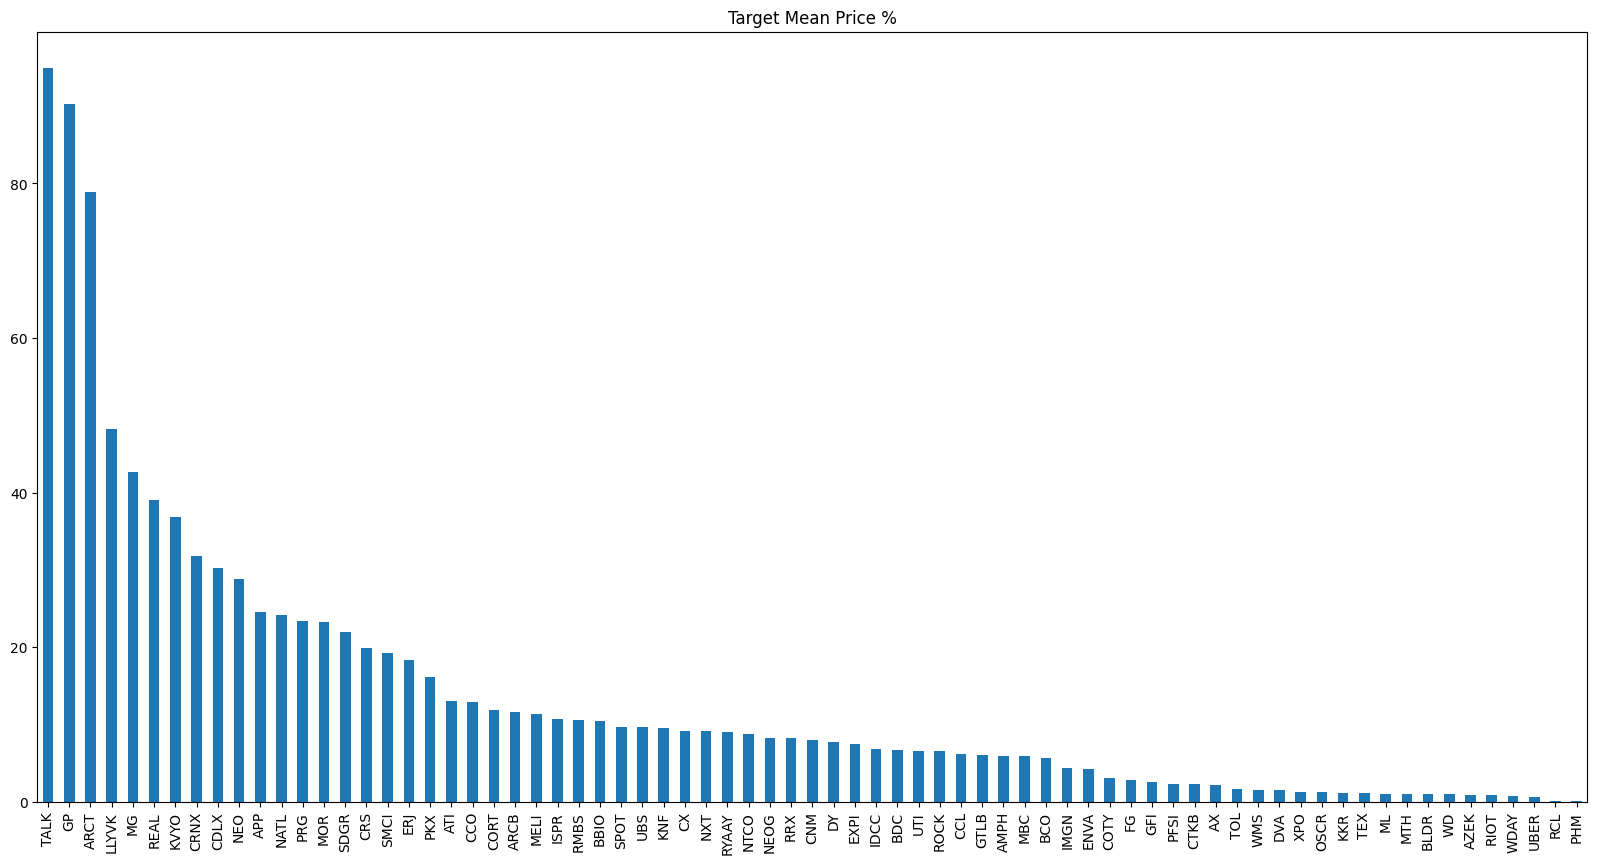

In [93]:
best_options = analitycs['TO_MEAN'].sort_values(ascending=False)
best_options = best_options[best_options > 0]
best_options.plot(kind='bar', figsize=(20, 10), title='Target Mean Price %')

,name,industry,sector,trailingPE,forwardPE,profitMargins,pegRatio,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,operatingMargins,TO_MEAN
TALK,"Talkspace, Inc.",Health Information Services,Healthcare,NaN,-256.5,-0.26245,NaN,2.565,5.0,5.0,5.00,5.0,1.5,strong_buy,1.0,-0.13401,94.9
GP,GreenPower Motor Company Inc.,Farm & Heavy Construction Machinery,Industrials,NaN,-9.954545,-0.26429,NaN,3.285,7.0,5.0,6.25,6.5,2.2,buy,4.0,-0.47234,90.3
ARCT,Arcturus Therapeutics Holdings,Biotechnology,Healthcare,8.780585,-10.221362,0.33530,NaN,33.015,140.0,17.5,59.06,51.0,2.0,buy,9.0,-0.42787,78.9
LLYVK,Liberty Media Corporation - Ser,Entertainment,Communication Services,NaN,20.311827,0.00000,NaN,37.780,56.0,56.0,56.00,56.0,2.0,buy,1.0,0.00000,48.2
MG,Mistras Group Inc,Security & Protection Services,Industrials,NaN,9.933333,-0.01750,5.12,7.450,11.5,9.0,10.63,11.0,1.5,strong_buy,4.0,0.06590,42.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COKE,"Coca-Cola Consolidated, Inc.",Beverages - Non-Alcoholic,Consumer Defensive,19.588663,24.141243,0.06838,NaN,940.060,NaN,NaN,NaN,NaN,NaN,none,NaN,0.12653,NaN
NHC,National HealthCare Corporation,Medical Care Facilities,Healthcare,32.852234,222.32558,0.04051,NaN,95.600,NaN,NaN,NaN,NaN,NaN,none,NaN,0.04542,NaN
ITB,iShares U.S. Home Construction,NaN,NaN,11.350100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEAM,Atlassian Corporation,Software - Application,Technology,NaN,79.07027,-0.13628,NaN,241.955,NaN,NaN,NaN,NaN,NaN,none,NaN,-0.01930,NaN
